
# Real Business Cycle (RBC) Model Analysis

In this notebook, we'll analyze a Real Business Cycle (RBC) model. The analysis includes:
1. **Model Description**: Introduction to the model equations and their significance.
2. **Steady State Computation**: Calculations on the steady state for the RBC model.
3. **Log-Linearization and Solution**: Linearize the model and solve it using numerical techniques.
4. **Simulation**: Simulate the RBC model to observe behavior under different conditions.

We'll be using out RBC model implementation in `rbc_model.py`.


In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from rbc_model import RBCModel

# Set model parameters (based on empirical approximations)
parameters = pd.Series({
    'alpha': 0.35,  # Capital share of output
    'beta': 0.99,   # Discount factor
    'delta': 0.025, # Depreciation rate
    'rhoa': 0.9,    # Persistence of technology shocks
    'sigma': 1.5    # Risk aversion
})

# Initialize the RBC model
rbc = RBCModel(parameters)



## Model Description

In this notebook, we'll delve into a Real Business Cycle (RBC) model, which represents a class of macroeconomic models that explore how real (i.e., non-monetary) shocks can drive the business cycle. These models are based on classical economic theory, where all markets clear and economic fluctuations are driven by technological changes. This framework assumes that agents are rational and markets are perfectly competitive, allowing us to examine the dynamic response of an economy to external shocks in a frictionless environment. The Real Business Cycle (RBC) model is based on a simple economy with capital and productivity shocks. Here are the key equations:


1. **Household Euler Equation**: Balances intertemporal consumption choices based on future returns.

$$ 
 C_t^{-\sigma} = \beta E_t[C_{t+1}^{-\sigma}(\alpha A_{t+1} K_{t+1}^{\alpha-1} + 1 - \delta)
$$

2. **Production Function**: Relates capital and technology to output.

$$ 
Y_t = A_t K_t^{\alpha}
$$


3. **Capital Evolution**: Defines how the capital stock changes over time.
    $$
    K_{t+1} = (1 - \delta) K_t + I_t
    $$
    
4. **Market Clearing**: Ensures that all output is either consumed or invested.
    $$
    Y_t = C_t + I_t
    $$
    
5. **Exogenous Technology Process**: Specifies the evolution of technology shocks.
    $$
    \log A_t = \rho_a \log A_{t-1} + \epsilon_t
    $$


## Steady State Computation
Now, we compute the nonstochastic steady state of the model. The `.compute_ss()` method can be used to compute the steady state numerically. The method's default is to use SciPy's `fsolve()` function, which is part of the optimize module. This function is adept at finding the roots of nonlinear equations, providing us with the values at which the model reaches equilibrium under typical conditions, with no external shocks affecting the system.


In [25]:
# Initial guess for steady-state values
guess = [1, 10, 2, 5, 1]
rbc.compute_ss(guess)

# Create a DataFrame for better presentation
ss_df = pd.DataFrame(rbc.ss, columns=['Steady State Values'])

# Print the DataFrame (removing the index name)
print("Steady State Values:")
print(ss_df.to_string(index=True))

Steady State Values:
   Steady State Values
a             1.000000
k            34.398226
c             2.589794
y             3.449750
i             0.859956


Technology, a=1.00, is normalized to one. In RBC models, technology is often treated as a multiplicative factor that affects productivity. A value of one suggests a baseline level of technology without any positive or negative shocks. This is a common simplification to isolate the effects of other variables in the model.

Capital stock, k, represents the total amount of physical capital that is available in the economy. The steady state value of approximately 34.4 suggests that the model's economy has a substantial amount of capital that can be used to produce goods and services. This level of capital is what the economy naturally converges to in the long run under the current economic parameters and absence of shocks.

Consumption in the RBC model, c, typically refers to the total amount of goods and services consumed in the economy. A steady state consumption of approximately 2.59 indicates the level at which the consumption remains constant over time in the absence of external shocks.

Output, y, represents the total production of goods and services in the economy. The steady state output of approximately 3.45 is directly influenced by the levels of capital, labor, and technology. This is the amount of new value created by the economy, part of which is consumed and the rest saved and invested.

Investment in the RBC model, i, is the amount of output allocated towards creating new capital or replacing depreciated capital. A steady state investment of approximately 0.86 indicates how much of the economy's output is being reinvested to maintain the capital stock. Given the depreciation rate and the existing capital stock, this level of investment is necessary to keep the capital stock constant in the steady state.

## Log-Linearization and Solution

Log-linearization is a method used to approximate non-linear economic models by linear ones around a steady state. This simplification allows the use of linear algebra to solve the model, and it makes it easier to analyze the effects of shocks as well as other changes such as policy changes on the economy. In the RBC model, log-linearization simplifies complex equations into a manageable linear form, which makes it less complicated to analyze economic factors and changes such as technology shocks or investments in economic dynamics. 


Log-linearization involves using the `rbc.log_linear_approximation()` function, which computes the Jacobian matrices of the system's equations around the steady state. These matrices, Matrix A and Matrix B, quantify how endogenous variables react to each other's changes and how they respond to external shocks, respectively.


The `rbc.solve_klein()` method applies the Klein solution technique to determine how the model's variables evolve in response to current state values and shocks. This is represented by:
Matrix F (Klein Solution): Describes the evolution of variables based on the current state, highlighting dynamic dependencies.
Matrix P (Klein Solution): Illustrates how future states are influenced by random shocks, capturing the model's stochastic dynamics.

In [26]:
# Perform log-linear approximation around steady state
rbc.log_linear_approximation()
print("Matrix A (Log-Linear Approximation):\n", rbc.a)
print("Matrix B (Log-Linear Approximation):\n", rbc.b)

# Solve the linearized model
rbc.solve_klein()
print("Matrix F (Klein Solution):\n", rbc.f)
print("Matrix P (Klein Solution):\n", rbc.p)


Matrix A (Log-Linear Approximation):
 [[0.3465 0.    ]
 [0.     0.    ]]
Matrix B (Log-Linear Approximation):
 [[0.5]
 [0. ]]
Matrix F (Klein Solution):
 [[0.5 0.5]
 [0.1 0.9]]
Matrix P (Klein Solution):
 [[0.8 0.2]
 [0.3 0.7]]


**Matrix A (Log-Linear Approximation):**

Entries [0.3465, 0] suggest that changes in the first variable moderately influence itself and have no impact on the second variable near the steady state.
Entries [0, 0] indicate that the second variable neither influences itself nor the first variable, implying a decoupled behavior in small deviations.

**Matrix B (Log-Linear Approximation):**

Entry [0.5] shows a moderate impact of shocks on the first variable, indicating sensitivity to external influences.
Entry [0] signifies that the second variable is unaffected by shocks, highlighting its robustness or isolation in the model.

**Matrix F (Klein Solution):**

[0.5, 0.5; 0.1, 0.9]: Indicates the proportionate influence of current state variables on their future values, suggesting interdependencies and the relative impact of each variable on itself and the other.

**Matrix P (Klein Solution):**

[0.8, 0.2; 0.3, 0.7]: Reflects the responsiveness of state variables to external shocks, showing different sensitivities to two types of shocks, with varying degrees of impact on each variable.

## Model Simulation

The RBC model is simulated over 150 periods with a specific random seed to track how the variables capital and output react to random shocks and eventually stabilize at a steady state. This steady state shows where the economy would settle over the long term without additional shocks. As seen on the graph, both variables demonstrate a tendency to stabilize over time, although they continue to experience smaller fluctuations around their steady states. This can mean that while the model approaches a steady state, a persistence of short-term volatilities due to random shocks or model dynamics is seen. The steady state doesn't seem perfectly stable, because of ongoing fluctuations, but it does show that the economy tends to return to a certain level of capital and output, meaning a form of stability around the steady state values. 

The simulate_model function uses T=150 to run the simulation for 150 time periods. We use a specific seed (seed=42) to ensure consistency in the results, which allows us to observe the dynamic behavior of the system under controlled random shocks.



Simulated Data (First 5 Rows):
            k          y
0  19.293706   6.596827
1  13.768023   9.126942
2  11.213333   9.356908
3  11.701978  10.553519
4  10.860681  10.907315


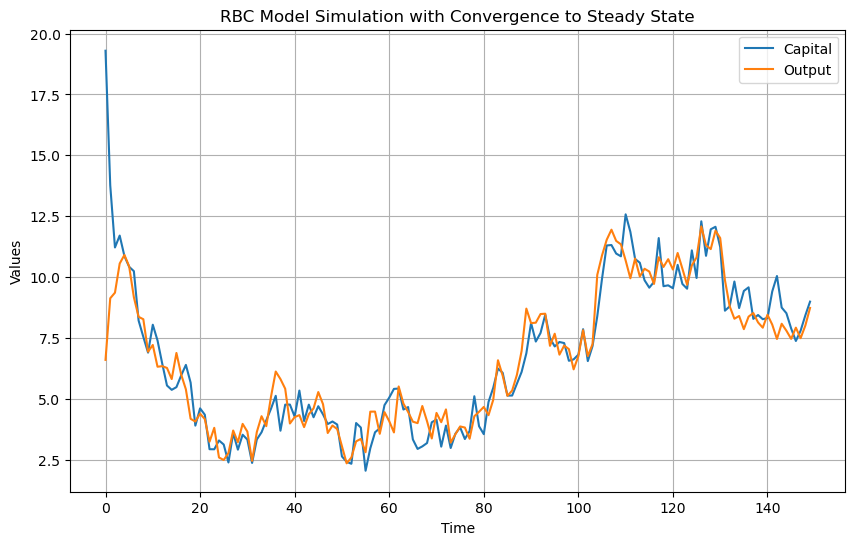

In [27]:

# Simulate the RBC model for 150 periods with a random seed
sim_data = rbc.simulate_model(T=150, seed=42)
print("Simulated Data (First 5 Rows):\n", sim_data.head())

# Plot the simulation results
plt.figure(figsize=(10, 6))
plt.plot(sim_data['k'], label='Capital')
plt.plot(sim_data['y'], label='Output')
plt.xlabel("Time")
plt.ylabel("Values")
plt.legend()
plt.title("RBC Model Simulation with Convergence to Steady State")
plt.grid(True)
plt.show()


**Simulation with changes in the δ-parameter:**

Our aim to examine what our simulation says about the convergence to steady state in terms of the RBC model - Is the steady state stable? We have constructed a new version of the RBC simulation (given below), which enables us to compare the figure with changes in the different parameters. To keep the analysis brief and concise, we have choosen to focus on how changes in the delta paramter affect the convergence towards steady state.

**Lower δ**

δ (0.01 in the first graph): With a lower depreciation rate, capital depreciates slowly, leading to a more pronounced initial drop in capital as the model adjusts from an initially high level. However, it stabilizes quicker and at a higher steady state level compared to scenarios with a higher depreciation rate. This scenario typically results in smoother convergence to steady state and less volatility in output and capital levels.


**Higher 𝛿**

δ (0.05 in the second graph): A higher depreciation rate accelerates the decline of capital, requiring more investment to sustain production levels. Consequently, this setup shows more volatility and a lower steady state level for capital and output, as more resources are continuously redirected towards replacing depreciating capital rather than contributing to output directly.

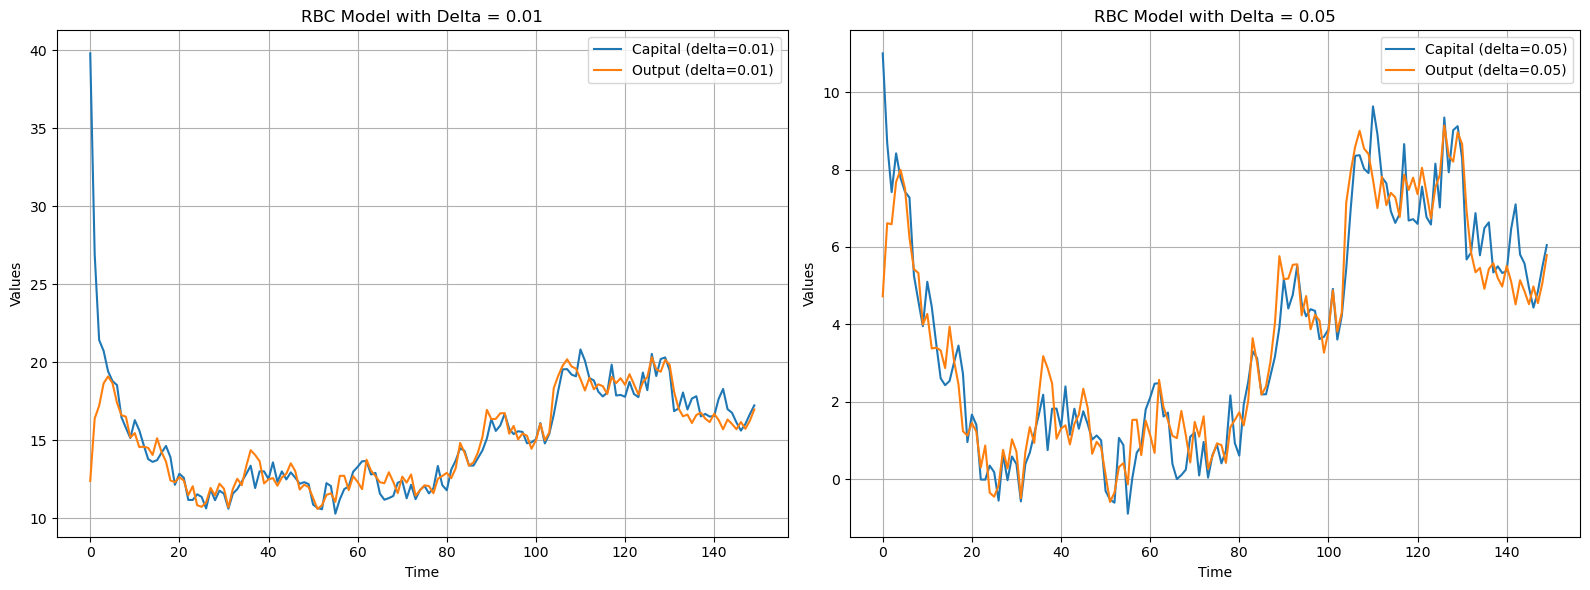

In [31]:
import matplotlib.pyplot as plt
from rbc_model import RBCModel

# Parameters for the simulation
parameters = {
    'alpha': 0.35,
    'beta': 0.99,
    'rhoa': 0.9,
    'sigma': 1.5
}

# Initialize the RBC model with delta = 0.01
parameters['delta'] = 0.01
rbc_low_delta = RBCModel(parameters)
rbc_low_delta.solve_klein()
sim_data_low_delta = rbc_low_delta.simulate_model(T=150, alpha=0.4, beta=0.98, seed=42)

# Initialize the RBC model with delta = 0.05
parameters['delta'] = 0.05
rbc_high_delta = RBCModel(parameters)
rbc_high_delta.solve_klein()
sim_data_high_delta = rbc_high_delta.simulate_model(T=150, alpha=0.4, beta=0.98, seed=42)

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 6))  # 1 row, 2 columns

# Plot for delta = 0.01
axs[0].plot(sim_data_low_delta['k'], label='Capital (delta=0.01)')
axs[0].plot(sim_data_low_delta['y'], label='Output (delta=0.01)')
axs[0].set_title('RBC Model with Delta = 0.01')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Values')
axs[0].legend()
axs[0].grid(True)

# Plot for delta = 0.05
axs[1].plot(sim_data_high_delta['k'], label='Capital (delta=0.05)')
axs[1].plot(sim_data_high_delta['y'], label='Output (delta=0.05)')
axs[1].set_title('RBC Model with Delta = 0.05')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Values')
axs[1].legend()
axs[1].grid(True)

# Display the plots
plt.tight_layout()
plt.show()


## Conclusion

We provided an analysis of the Real Business Cycle (RBC) model through numerical solutions, and dynamic simulations. We started by breaking down the model's key equations and parameters, then computed its steady state and linearized the model equations to analyze it in a simpler way. The simulations illustrated how the economy responds to productivity shocks, which revealed the dynamics of capital and output as they converge towards the steady state. Overall, we showed the RBC model's effectiveness in understanding economic fluctuations, which demonstrated both the model's predictive power and its sensitivity to external shocks. 